<a href="https://www.kaggle.com/code/adelinmil/top-7-solution?scriptVersionId=138611137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 8.1 MB

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler

from pycaret.classification import setup, compare_models
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data Exploration

In [3]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data = pd.concat([train.drop('Transported', axis = 1), test], axis = 0).reset_index(drop = True)

data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [6]:
print(data.shape, train.shape, test.shape)

(12970, 13) (8693, 14) (4277, 13)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [8]:
data.describe(include = 'object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,12970,12682,12660,12671,12696,12674,12676
unique,12970,3,2,9825,3,2,12629
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins
freq,1,6865,8079,8,8871,12401,2


In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Cleaning

In [10]:
data[data.duplicated() == True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [11]:
data[data['Cabin'] == 'G/734/S']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4221,4498_01,Earth,False,G/734/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,Valex Munozanson
4222,4498_02,Earth,True,G/734/S,PSO J318.5-22,14.0,False,0.0,0.0,0.0,0.0,0.0,Loise Beckeetter
4223,4498_03,Earth,True,G/734/S,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Lorie Beckeetter
4224,4498_04,Earth,False,G/734/S,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,NaN,Dandy Munozanson
4225,4498_05,Earth,True,G/734/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Karay Beckeetter
4226,4498_06,Earth,False,G/734/S,TRAPPIST-1e,15.0,False,0.0,893.0,0.0,0.0,0.0,Line Munozanson
4227,4498_07,Earth,False,G/734/S,TRAPPIST-1e,39.0,False,0.0,2.0,0.0,69.0,836.0,Dary Mallerez
4228,4498_08,Earth,False,G/734/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Kendy Munozanson


In [12]:
data.select_dtypes('object').isna().sum()

PassengerId      0
HomePlanet     288
CryoSleep      310
Cabin          299
Destination    274
VIP            296
Name           294
dtype: int64

In [13]:
# Columns imputed with mode value
for column in [
    'HomePlanet',
    'CryoSleep',
    'Destination',
    'VIP'
]:
    data[column].fillna(data[column].mode()[0], inplace = True)

In [14]:
for column in [
    'Cabin',
    'Name'
]:
    data[column].fillna(method = 'ffill', inplace = True)

In [15]:
data.select_dtypes('object').isna().sum()

PassengerId    0
HomePlanet     0
Cabin          0
Destination    0
Name           0
dtype: int64

In [16]:
data.select_dtypes(np.number).isna().sum()

Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

In [17]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

data['RoomService'].fillna(data['RoomService'].median(), inplace = True)
data['FoodCourt'].fillna(data['FoodCourt'].median(), inplace = True)
data['ShoppingMall'].fillna(data['ShoppingMall'].median(), inplace = True)
data['Spa'].fillna(data['Spa'].median(), inplace = True)
data['VRDeck'].fillna(data['VRDeck'].median(), inplace = True)

In [18]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# Feature Engineering

In [19]:
data1 = data.copy()

In [20]:
data1['CryoSleep'] = data1['CryoSleep'].astype(str)
data1['VIP'] = data1['VIP'].astype(str)

In [21]:
data1['Passenger_num'] = data1['PassengerId'].apply(lambda x: x.split("_")[1]).astype(np.number)

In [22]:
data1['TotalSpent'] = data1['RoomService'] + data1['FoodCourt'] + data1['ShoppingMall'] + data1['Spa'] + data1['VRDeck']
data1[['TotalSpent', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].head()

,TotalSpent,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0,0.0
1,736.0,109.0,9.0,25.0,549.0,44.0
2,10383.0,43.0,3576.0,0.0,6715.0,49.0
3,5176.0,0.0,1283.0,371.0,3329.0,193.0
4,1091.0,303.0,70.0,151.0,565.0,2.0


In [23]:
data1['Cabin_deck'] = data1['Cabin'].apply(lambda x:x.split('/')[0])
data1['Cabin_side'] = data1['Cabin'].apply(lambda x:x.split('/')[2])
data1['Cabin_num'] = data1['Cabin'].apply(lambda x:x.split('/')[1]).astype(np.number)

In [24]:
data1['FamilyName'] = data1['Name'].apply(lambda x: x.split()[1])
data1['TraveldAlone'] = data1['FamilyName'].apply(lambda x: 'Yes' if (data1['FamilyName'].value_counts()[x] == 1) else 'No')

In [25]:
data1['IsAdult'] = np.where(data1['Age'] < 19, 'False', 'True')

In [26]:
# data1['PassengerGroup'] = data1['PassengerId'].apply(lambda x: x.split('_')[0])
# data1['PartOfGroup'] = data1['PassengerGroup'].apply(lambda x: 'Yes' if data1['PassengerGroup'].value_counts()[x] > 1 else 'No')

In [27]:
data1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_num,TotalSpent,Cabin_deck,Cabin_side,Cabin_num,FamilyName,TraveldAlone,IsAdult
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1.0,0.0,B,P,0.0,Ofracculy,No,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,736.0,F,S,0.0,Vines,No,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1.0,10383.0,A,S,0.0,Susent,No,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,2.0,5176.0,A,S,0.0,Susent,No,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1091.0,F,S,1.0,Santantines,No,False


# Data Visualization

In [28]:
data2 = data1.copy()

In [29]:
data2.drop(['PassengerId', 'FamilyName', 'Cabin', 'Name'], axis = 1, inplace = True)

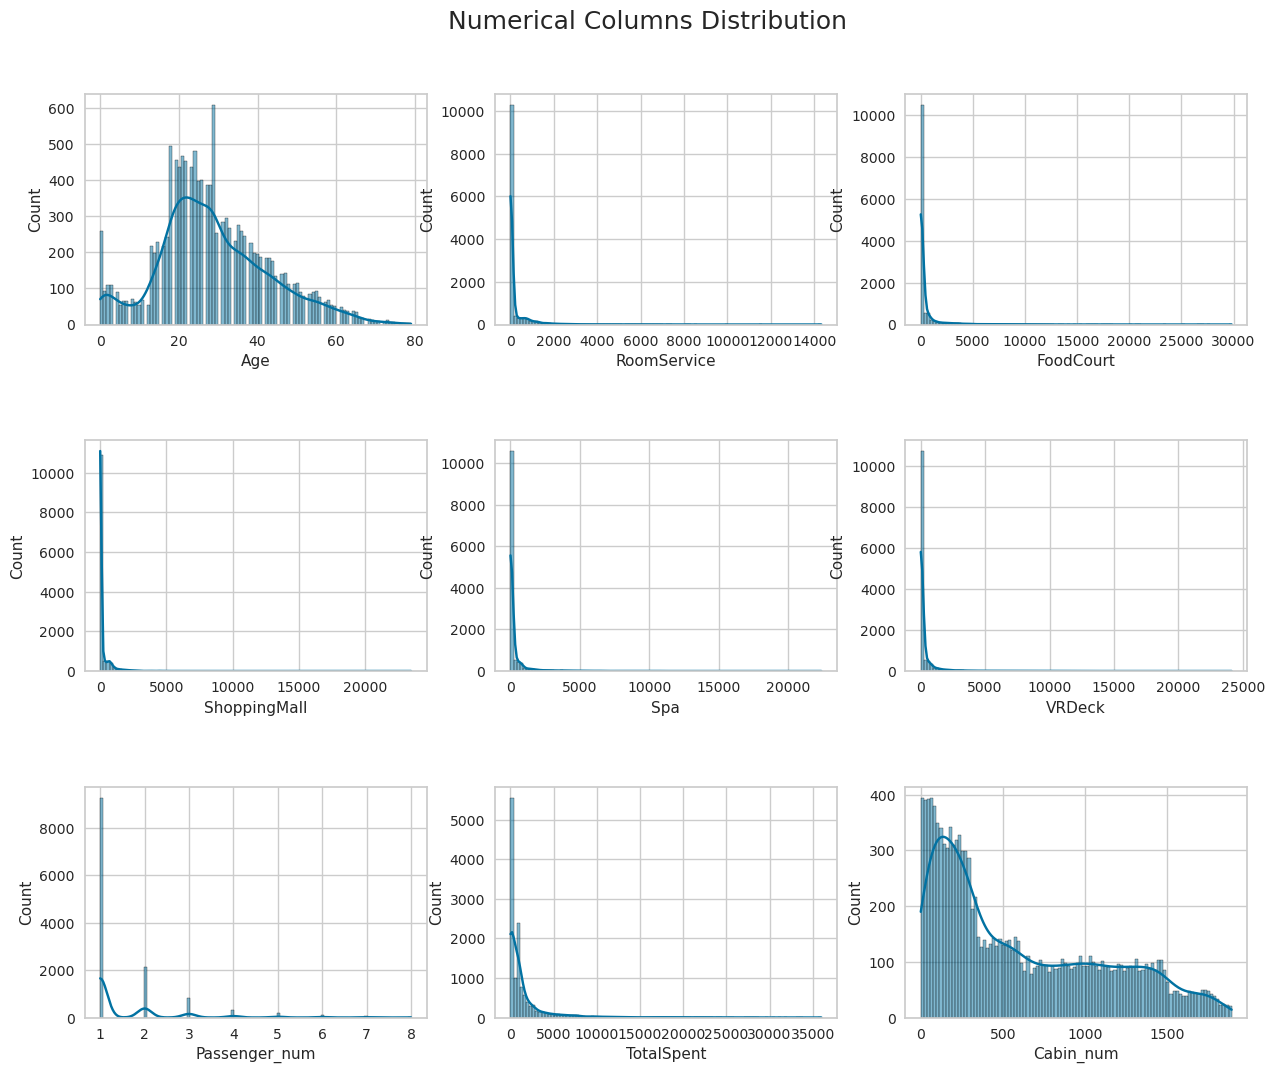

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Numerical Columns Distribution", fontsize=18, y=0.95)

numerical_columns = data2.select_dtypes(np.number).columns
for column, ax in zip(numerical_columns, axs.ravel()):
    sns.histplot(data2[column], kde = True, bins = 100, ax = ax)

<Axes: xlabel='Transported', ylabel='count'>

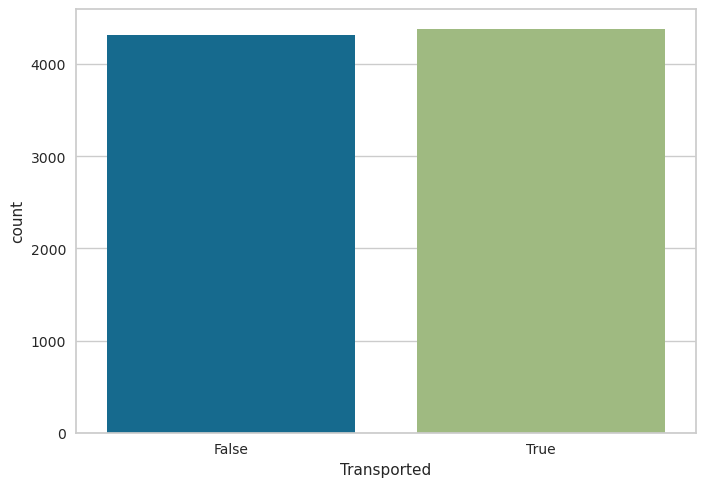

In [31]:
sns.countplot(x = 'Transported', data = train)

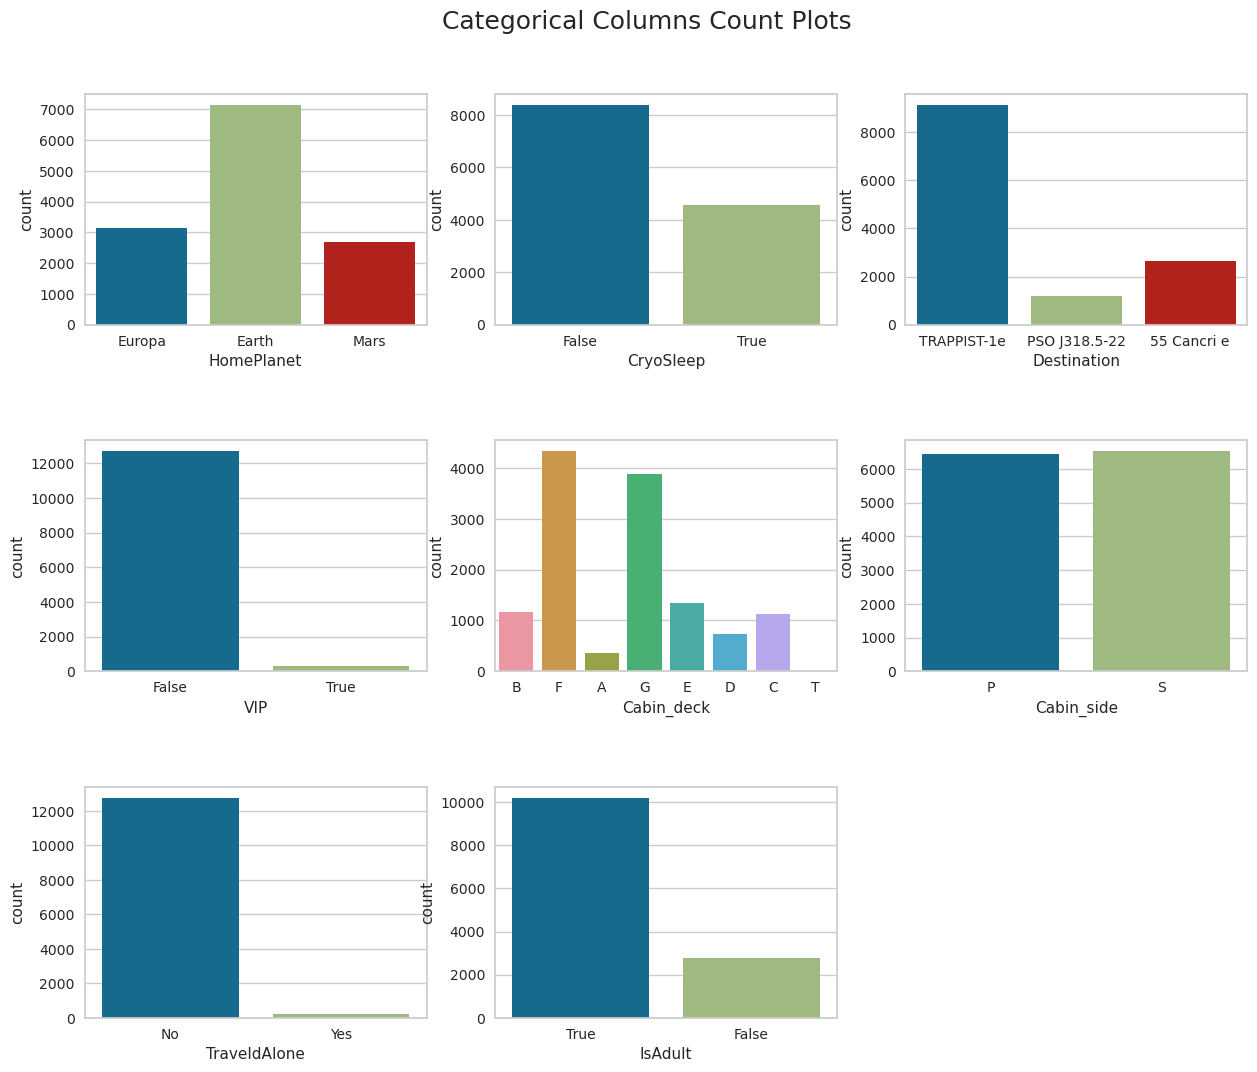

In [32]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Categorical Columns Count Plots", fontsize=18, y=0.95)

categorical_columns = data2.select_dtypes('object').columns
for idx, column in enumerate(categorical_columns):
    ax = plt.subplot(3, 3, idx + 1)
    sns.countplot(x = column, data = data2, ax = ax)

<Axes: >

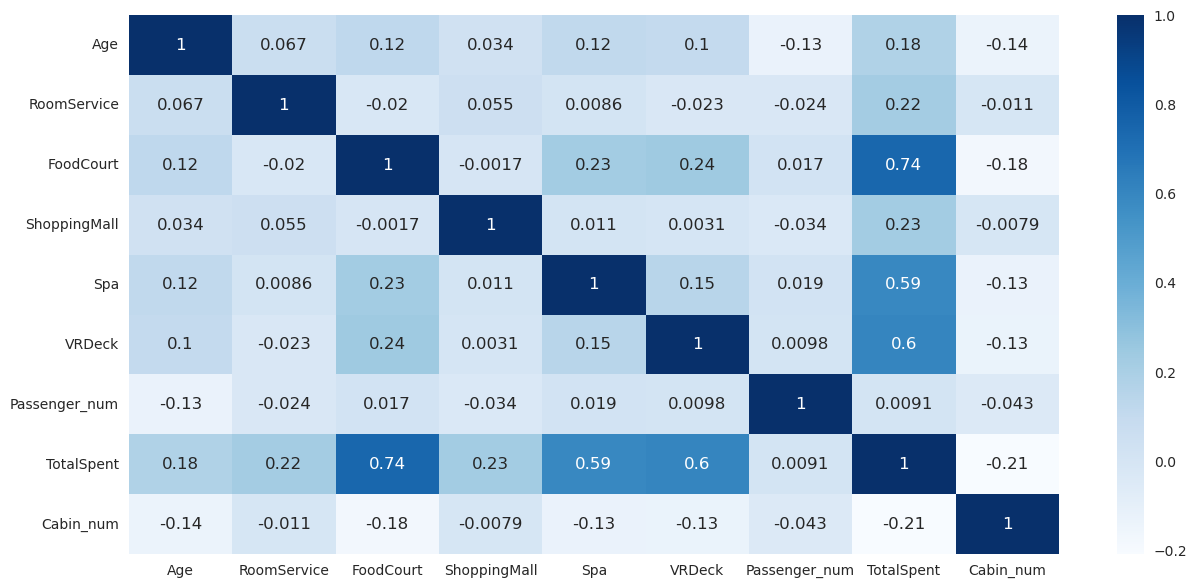

In [33]:
plt.figure(figsize = (15, 7))
sns.heatmap(data2.corr(), cmap = 'Blues', annot = True)

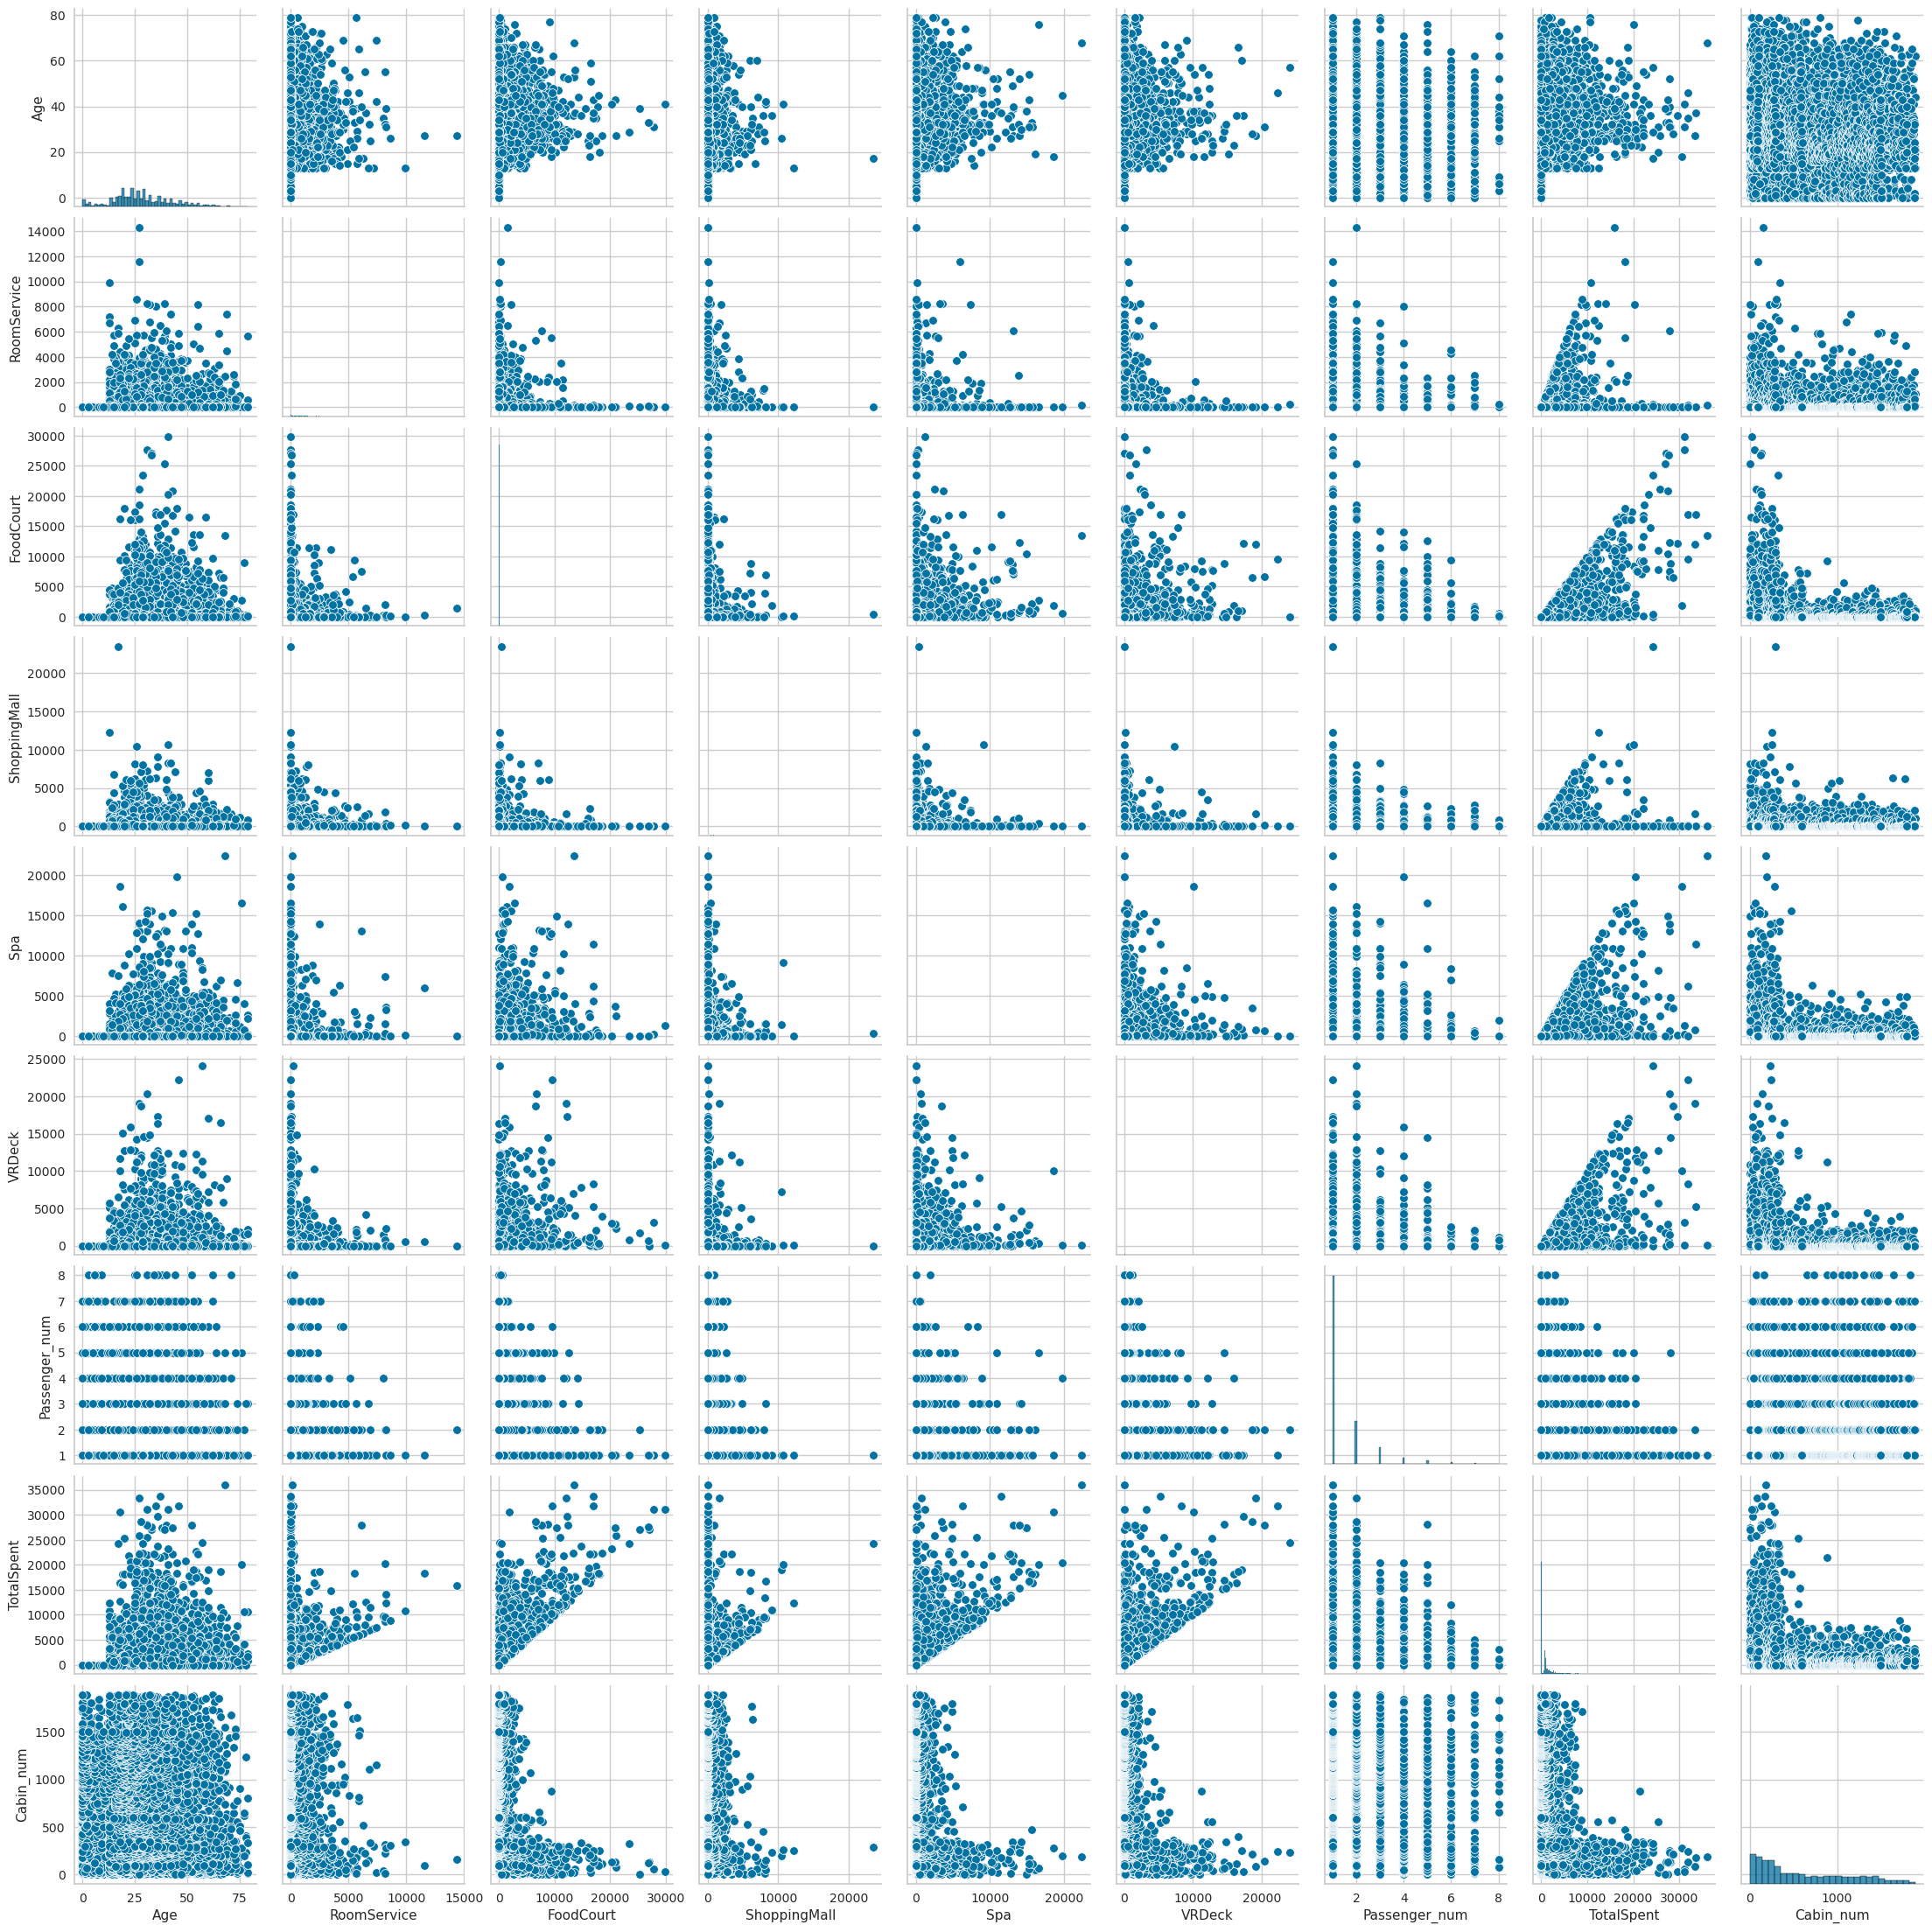

In [34]:
sns.pairplot(data2)

# Feature Transformation

In [35]:
data3 = data2.copy()

In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     12970 non-null  object 
 1   CryoSleep      12970 non-null  object 
 2   Destination    12970 non-null  object 
 3   Age            12970 non-null  float64
 4   VIP            12970 non-null  object 
 5   RoomService    12970 non-null  float64
 6   FoodCourt      12970 non-null  float64
 7   ShoppingMall   12970 non-null  float64
 8   Spa            12970 non-null  float64
 9   VRDeck         12970 non-null  float64
 10  Passenger_num  12970 non-null  float64
 11  TotalSpent     12970 non-null  float64
 12  Cabin_deck     12970 non-null  object 
 13  Cabin_side     12970 non-null  object 
 14  Cabin_num      12970 non-null  float64
 15  TraveldAlone   12970 non-null  object 
 16  IsAdult        12970 non-null  object 
dtypes: float64(9), object(8)
memory usage: 1.7+ MB


In [37]:
data3 = pd.get_dummies(data3)

data3.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_num,TotalSpent,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,TraveldAlone_No,TraveldAlone_Yes,IsAdult_False,IsAdult_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,736.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,10383.0,0.0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,2.0,5176.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1091.0,1.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [38]:
data3.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Passenger_num                0
TotalSpent                   0
Cabin_num                    0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Cabin_deck_A                 0
Cabin_deck_B                 0
Cabin_deck_C                 0
Cabin_deck_D                 0
Cabin_deck_E                 0
Cabin_deck_F                 0
Cabin_deck_G                 0
Cabin_deck_T                 0
Cabin_side_P                 0
Cabin_side_S                 0
TraveldAlone_No              0
TraveldAlone_Yes             0
IsAdult_False                0
IsAdult_

In [39]:
rs = RobustScaler()

rs.fit(data3)

data4 = pd.DataFrame(rs.transform(data3), columns = data3.columns, index = data3.index)

In [40]:
data4.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_num,TotalSpent,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,TraveldAlone_No,TraveldAlone_Yes,IsAdult_False,IsAdult_True
0,0.705882,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
1,-0.176471,2.549708,0.143426,1.086957,10.98,1.222222,0.0,0.013870,-0.513707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.823529,1.005848,56.988048,0.000000,134.30,1.361111,0.0,6.703883,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352941,0.000000,20.446215,16.130435,66.58,5.361111,1.0,3.092926,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.647059,7.087719,1.115538,6.565217,11.30,0.055556,0.0,0.260055,-0.512515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0


In [41]:
data4.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Passenger_num                0
TotalSpent                   0
Cabin_num                    0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Cabin_deck_A                 0
Cabin_deck_B                 0
Cabin_deck_C                 0
Cabin_deck_D                 0
Cabin_deck_E                 0
Cabin_deck_F                 0
Cabin_deck_G                 0
Cabin_deck_T                 0
Cabin_side_P                 0
Cabin_side_S                 0
TraveldAlone_No              0
TraveldAlone_Yes             0
IsAdult_False                0
IsAdult_

# Create final train test data

In [42]:
train_final = data4.iloc[:len(train), :]
train_final['Transported'] = train['Transported'].map({False: 0, True: 1})

train_final

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_num,TotalSpent,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,TraveldAlone_No,TraveldAlone_Yes,IsAdult_False,IsAdult_True,Transported
0,0.705882,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0
1,-0.176471,2.549708,0.143426,1.086957,10.98,1.222222,0.0,0.013870,-0.513707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.823529,1.005848,56.988048,0.000000,134.30,1.361111,0.0,6.703883,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.352941,0.000000,20.446215,16.130435,66.58,5.361111,1.0,3.092926,-0.513707,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.647059,7.087719,1.115538,6.565217,11.30,0.055556,0.0,0.260055,-0.512515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.823529,0.000000,108.669323,0.000000,32.86,2.055556,0.0,5.423024,-0.396901,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0
8689,-0.529412,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,1.272944,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0
8690,-0.058824,0.000000,0.000000,81.391304,0.02,0.000000,0.0,0.802358,1.274136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8691,0.294118,0.000000,16.717131,0.000000,7.06,89.861111,0.0,2.719140,0.210965,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
X = train_final.drop('Transported', axis = 1)
y = train_final['Transported']

In [44]:
test_final = data4.iloc[len(train):, :].reset_index(drop = True)

test_final

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_num,TotalSpent,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,TraveldAlone_No,TraveldAlone_Yes,IsAdult_False,IsAdult_True
0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,-0.510131,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.470588,0.000000,0.143426,0.000000,56.46,0.000000,0.0,1.467406,-0.508939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,-0.513707,-1.0,1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.647059,0.000000,106.007968,0.000000,3.62,16.250000,0.0,4.647712,-0.512515,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411765,0.233918,0.000000,27.608696,0.00,0.000000,0.0,-0.049237,-0.507747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.411765,0.000000,0.000000,0.000000,0.00,0.000000,1.0,-0.496533,1.269368,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.882353,0.000000,13.498008,0.739130,0.20,4.000000,0.0,0.209431,1.269368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,0.104233,0.000000,0.000000,0.000000,0.00,0.000000,0.0,-0.496533,-0.160906,-1.0,0.0,1.0,-1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
4275,0.104233,0.000000,42.709163,0.000000,0.00,14.527778,0.0,1.724688,-0.159714,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0


In [45]:
test_ids = test['PassengerId']

# Model Selection

In [46]:
setup(data = train_final, target = 'Transported')

,Description,Value
0,Session id,7277
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 34)"
4,Transformed data shape,"(8693, 34)"
5,Transformed train set shape,"(6085, 34)"
6,Transformed test set shape,"(2608, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


In [47]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8164,0.9059,0.8147,0.8204,0.8172,0.6329,0.6334,5.3290
lightgbm,Light Gradient Boosting Machine,0.8062,0.9003,0.7974,0.8146,0.8057,0.6125,0.6130,0.6470
gbc,Gradient Boosting Classifier,0.8028,0.8971,0.8179,0.7965,0.8069,0.6055,0.6059,0.6320
xgboost,Extreme Gradient Boosting,0.8021,0.8947,0.7860,0.8151,0.7999,0.6044,0.6053,0.6420
rf,Random Forest Classifier,0.8018,0.8844,0.7556,0.8358,0.7933,0.6039,0.6072,0.6050
ada,Ada Boost Classifier,0.7946,0.8801,0.8356,0.7747,0.8038,0.5889,0.5912,0.3130
et,Extra Trees Classifier,0.7910,0.8676,0.7445,0.8243,0.7820,0.5822,0.5855,0.6110
lr,Logistic Regression,0.7895,0.8791,0.8013,0.7855,0.7931,0.5789,0.5794,0.6190
knn,K Neighbors Classifier,0.7788,0.8537,0.7615,0.7921,0.7763,0.5577,0.5585,0.0930
ridge,Ridge Classifier,0.7721,0.0000,0.7171,0.8090,0.7601,0.5445,0.5483,0.0450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# HyperParameter Tuning

In [48]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

In [49]:
import optuna

In [50]:
# CatBoost Classifier
'''kf = KFold(n_splits = 10)
def objective(trial):
    
    params = {
         'iterations': trial.suggest_int("iterations", 50, 1000),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'depth': trial.suggest_int("depth", 4, 10),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        'bootstrap_type': trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        'random_strength': trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        'bagging_temperature':trial.suggest_float("bagging_temperature", 0.0, 10.0),
        'od_type': trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        'od_wait':trial.suggest_int("od_wait", 10, 50),
    }
    
    clf = CatBoostClassifier(**params, verbose = 0, random_seed = 0)
    clf.fit(X, y)
    
    scores = cross_val_score(clf, X, y,
                             cv = kf, scoring = 'accuracy', n_jobs=-1)
    
    return np.mean(scores)


study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)'''

'kf = KFold(n_splits = 10)\ndef objective(trial):\n    \n    params = {\n         \'iterations\': trial.suggest_int("iterations", 50, 1000),\n        \'learning_rate\': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),\n        \'depth\': trial.suggest_int("depth", 4, 10),\n        \'l2_leaf_reg\': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),\n        \'bootstrap_type\': trial.suggest_categorical("bootstrap_type", ["Bayesian"]),\n        \'random_strength\': trial.suggest_float("random_strength", 1e-8, 10.0, log=True),\n        \'bagging_temperature\':trial.suggest_float("bagging_temperature", 0.0, 10.0),\n        \'od_type\': trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),\n        \'od_wait\':trial.suggest_int("od_wait", 10, 50),\n    }\n    \n    clf = CatBoostClassifier(**params, verbose = 0, random_seed = 0)\n    clf.fit(X, y)\n    \n    scores = cross_val_score(clf, X, y,\n                             cv = kf, scoring = \'accuracy\', n_jobs=-1)

In [51]:
# print('Best hyperparameters:', study.best_params)
# print('Best Acuuracy:', study.best_value)

In [52]:
# CatBoost hyperparameters
cb_best_params = {
    'iterations': 822,
    'learning_rate': 0.013956654150976923,
     'depth': 6, 
     'l2_leaf_reg': 1.967011209087556e-06, 
    'bootstrap_type': 'Bayesian', 
    'random_strength': 7.731836006635953e-05, 
    'bagging_temperature': 1.163986825691941, 
    'od_type': 'Iter', 
    'od_wait': 50
}

# BaseLine Model

In [53]:
clf = CatBoostClassifier(**cb_best_params, verbose = 0, random_seed = 0,
                        eval_metric='Accuracy')

# clf.fit(X, y)

# Feature Selection

In [54]:
# from sklearn.feature_selection import SequentialFeatureSelector

# sf = SequentialFeatureSelector(clf, scoring='accuracy', direction = 'backward')
# sf.fit(X,y)

In [55]:
# best_features = list(sf.get_feature_names_out())
# best_features

In [56]:
best_features = ['RoomService',
 'Spa',
 'VRDeck',
 'TotalSpent',
 'HomePlanet_Mars',
 'CryoSleep_True',
 'Cabin_deck_C',
 'Cabin_deck_E',
 'Cabin_deck_G',
 'Cabin_deck_T',
 'Cabin_side_P',
 'Cabin_side_S',
 'TraveldAlone_No',
 'TraveldAlone_Yes',
 'IsAdult_False',
 'IsAdult_True']

In [57]:
clf.fit(X[best_features], y)

# Ensemble

### dIDN'T iMPROVE pERFORMANCE !!!

In [58]:
# cb_clf = CatBoostClassifier(**cb_best_params, verbose = 0, random_seed = 0)
# lgbm_clf = LGBMClassifier(**lgbm_params, verbose = -1, random_seed = 0)
# rf_clf = RandomForestClassifier(**rf_params, verbose = 0, random_state = 0)
# gb_clf = GradientBoostingClassifier(**gb_params, verbose = 0, random_state = 0)
# xgb_clf = XGBClassifier(**xgb_params, random_state = 0)

# models = [
#     (0.2, cb_clf),
#     (0.2, lgbm_clf),
#     (0.2, rf_clf),
#     (0.2, gb_clf),
#     (0.2, xgb_clf),
# ]

In [59]:
# predictions = np.zeros((len(test_final), 2))

In [60]:
# for weight, clf in models:
#     clf.fit(X, y)
#     predictions += clf.predict_proba(test_final)
#     print(f'{clf.__class__.__name__} done!')

In [61]:
# predictions /= 5

# predictions

In [62]:
# predictions = np.argmax(predictions, axis = 1).astype(bool)

# Submission

In [63]:
predictions = clf.predict(test_final[best_features]).astype(bool)
submission = pd.concat([test_ids, pd.Series(predictions, name = 'Transported')], axis = 1)

In [64]:
submission.to_csv('submission.csv', index = False)

# Evaluation

In [65]:
kf = KFold(n_splits = 10)
scores = cross_val_score(clf, X, y, cv = kf, scoring = 'accuracy')

scores

array([0.79310345, 0.78850575, 0.79655172, 0.79976985, 0.80782509,
       0.84810127, 0.83774453, 0.84119678, 0.82393556, 0.7986191 ])

In [66]:
print(scores.mean(), scores.std())

0.8135353094453924 0.021050377086132104
